In [2]:
import os
import pandas as pd
%matplotlib inline

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100
)

In [6]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
    page_size=100
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(bitcoin_sentiments)

cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...
2,0.2430,0.052,0.877,0.071,Our robot colleague Satoshi Nakaboto writes ab...
3,0.3612,0.000,0.947,0.053,"For those unfamiliar with the term, a “Bitcoin..."
4,0.7832,0.000,0.865,0.135,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
# Create the ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(Ethereum_sentiments)

cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3400,0.058,0.830,0.112,Hundreds of thousands of PC owners are donatin...
1,0.7003,0.000,0.837,0.163,Coinbase Wallet users can now send cryptocurre...
2,0.4019,0.000,0.937,0.063,What do we talk about when we talk about progr...
3,-0.2023,0.067,0.860,0.072,Thursday's ethereum network congestion perhaps...
4,0.0000,0.000,1.000,0.000,Introduction\r\nStill living in the shade of B...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.184020,0.034289,0.899093,0.066567
std,0.446283,0.050914,0.069829,0.059061
min,-0.851900,0.000000,0.680000,0.000000
25%,0.000000,0.000000,0.860000,0.000000
50%,0.172500,0.000000,0.898000,0.058000
75%,0.571900,0.053000,0.940000,0.102000
max,0.926000,0.243000,1.000000,0.281000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.162440,0.024750,0.917000,0.058200
std,0.399961,0.044129,0.053829,0.050475
min,-0.670500,0.000000,0.830000,0.000000
25%,-0.000450,0.000000,0.869750,0.000000
50%,0.214300,0.000000,0.921000,0.055500
75%,0.416125,0.050500,0.953000,0.082000
max,0.757900,0.153000,1.000000,0.163000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [90]:
# Expand the default stopwords list if necessary
more_stopwords = [',', '', 'char', 'chars', 'whats', 'say', 'fucking', 'according']

In [93]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)

    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + more_stopwords)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    
    return text
    
   # return tokens

In [61]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...,"[launching, two, cryptocurrencyoriented, smart..."
2,0.2430,0.052,0.877,0.071,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,0.3612,0.000,0.947,0.053,"For those unfamiliar with the term, a “Bitcoin...","[unfamiliar, term, bitcoin, faucet, usually, u..."
4,0.7832,0.000,0.865,0.135,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [62]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.3400,0.058,0.830,0.112,Hundreds of thousands of PC owners are donatin...,"[hundred, thousand, pc, owner, donating, cpu, ..."
1,0.7003,0.000,0.837,0.163,Coinbase Wallet users can now send cryptocurre...,"[coinbase, wallet, user, send, cryptocurrencie..."
2,0.4019,0.000,0.937,0.063,What do we talk about when we talk about progr...,"[talk, talk, progressive, proofofwork, progpow..."
3,-0.2023,0.067,0.860,0.072,Thursday's ethereum network congestion perhaps...,"[thursday, ethereum, network, congestion, perh..."
4,0.0000,0.000,1.000,0.000,Introduction\r\nStill living in the shade of B...,"[introduction, still, living, shade, bitcoin, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [63]:
from collections import Counter
from nltk import ngrams

In [64]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('bitcoin', 'going'): 1,
 ('going', 'remarkably'): 1,
 ('remarkably', 'bad'): 1,
 ('bad', 'day'): 1,
 ('day', 'turn'): 1,
 ('turn', 'asset'): 1,
 ('asset', 'rough'): 1,
 ('rough', 'month'): 1,
 ('month', 'including'): 1,
 ('including', 'cryptocurrencies'): 1}

In [65]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('hundred', 'thousand'): 1,
 ('thousand', 'pc'): 1,
 ('pc', 'owner'): 1,
 ('owner', 'donating'): 1,
 ('donating', 'cpu'): 1,
 ('cpu', 'power'): 1,
 ('power', 'help'): 1,
 ('help', 'fight'): 1,
 ('fight', 'coronavirus'): 1,
 ('coronavirus', 'within'): 1}

In [66]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [67]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('bitcoin', 114),
 ('btc', 48),
 ('market', 31),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('price', 27),
 ('hour', 25),
 ('day', 23),
 ('past', 23),
 ('cryptocurrency', 22)]

In [68]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('ethereum', 15),
 ('eth', 9),
 ('blockchain', 5),
 ('ether', 5),
 ('coinbase', 4),
 ('wallet', 4),
 ('one', 4),
 ('progpow', 4),
 ('mining', 4),
 ('wa', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

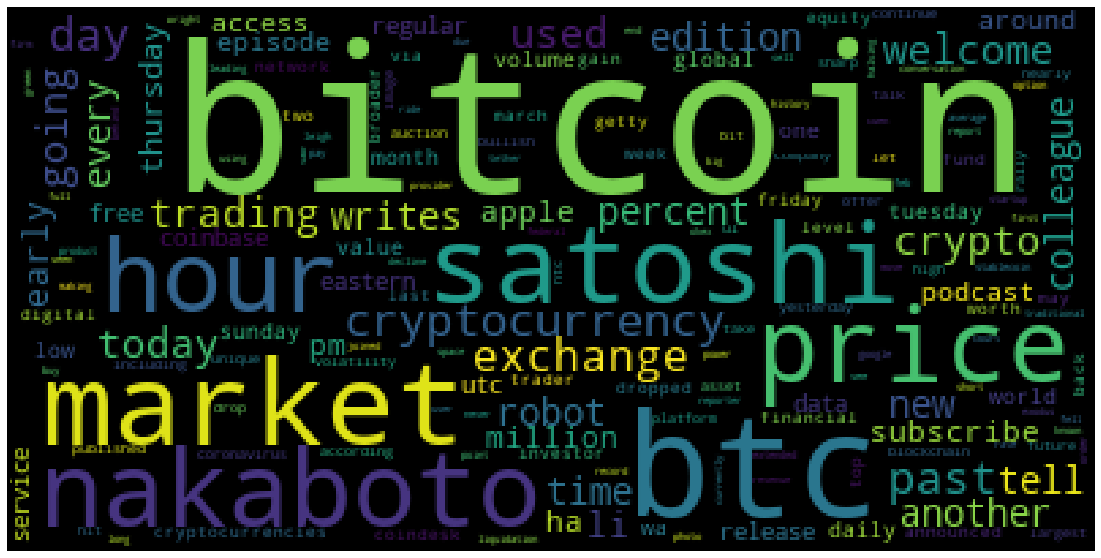

In [88]:
# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + more_stopwords)
for token in btc_df.Text:
    btc_corpus += token
input_text = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(input_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

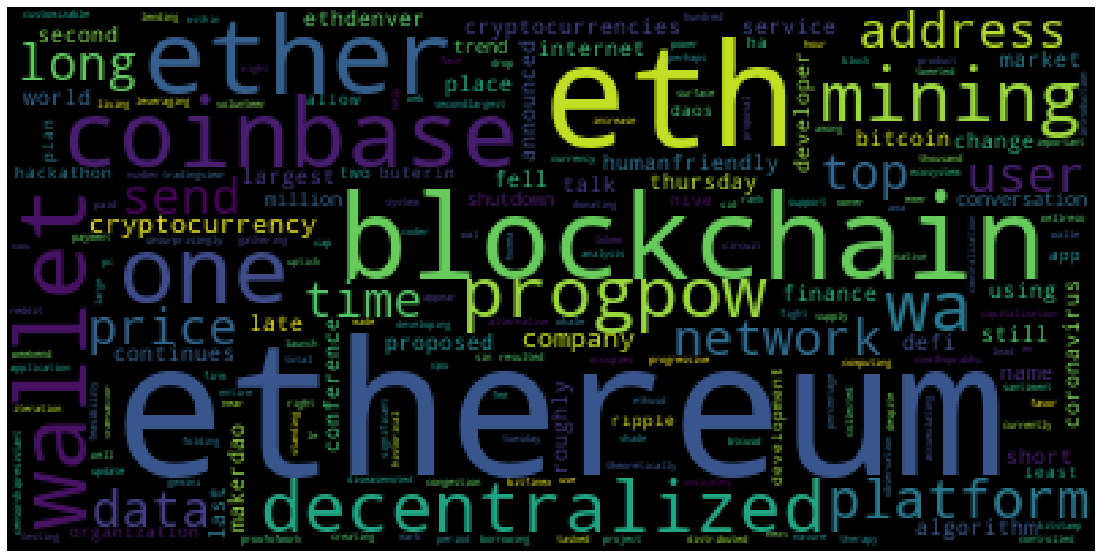

In [91]:
# Generate the Ethereum word cloud
eth_corpus = ''
sw = set(stopwords.words('english') + more_stopwords)
for token in eth_df.Text:
    eth_corpus += token
input_text = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(input_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [34]:
# Concatenate all of the bitcoin text together
btc_corpus

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As Bentham used to say: Fight the power!\r… [+3163 chars]For those unfamiliar with the term, a “Bitcoin Faucet” is usually used as an incentive in software that wants your attention. Complete a captcha or look at and adverti

In [35]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"
# Add a title to the document

In [36]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [37]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$11 million',
 '$112 million',
 '$118 million',
 '$178 million',
 '$198 million',
 '$6.1 million',
 '$700 billion',
 '+1724 chars]Blockchain.com',
 "+1993 chars]Let's",
 '+2864 chars]Kyber Network',
 '+3331',
 '+3469',
 '+7383 chars]Bitcoin Magazine',
 '0 percent',
 '1',
 '1 p.m. EST',
 '1 percent',
 '1,220',
 '1,666',
 '1.5%',
 '10,500',
 '110,000',
 '15%',
 '16:00',
 '18%',
 '19:00 UTC',
 '1:1',
 '20',
 '20 percent',
 '200',
 '2019',
 '2020',
 '3 p.m. ET',
 '3 p.m. Eastern time',
 '3.5 percent',
 '3.6 percent',
 '4 percent',
 '4,040.54069820',
 '4,700',
 '4:00 a.m. EST',
 '4G/5G',
 '5',
 '5 percent',
 '5,000-$5,500',
 '5,431',
 '6.8 percent',
 '7 percent',
 '7,830',
 '7,900',
 '8 percent',
 '8,000',
 '8,450',
 '8,600-$8,800',
 '8,674',
 '8,700',
 '8,756',
 '8,900',
 '850',
 '9',
 '9,000',
 '9,150',
 '9,270',
 '9,500',
 '9:00 UTC',
 'A couple of hours ago',
 'AFP',
 'Amun',
 'Anchain AI',
 'Android',
 'Android-bas',
 'Apple',
 'Apple Pod',
 'Apple Podca',
 'Apple Podcasts',
 'April 

---

## Ethereum NER

In [38]:
# Concatenate all of the bitcoin text together
eth_corpus

'hundreds of thousands of pc owners are donating their cpu power to help fight the coronavirus. within a reddit ama last night, folding at homea distributed computing project tasked with developing therapies for diseasenoted a 1,200% increase in volunteers sin… [+2024 chars]coinbase wallet users can now send cryptocurrencies to "short human-friendly addresses," as well as ones creating using the ethereum name service (ens).\r\nproduct lead sid coelho-prabhu announced tuesday that coinbase wallet now supports customizable walle use… [+1596 chars]what do we talk about when we talk about progressive proof-of-work (progpow) on ethereum?\r\non the surface, progpow is a proposed update to the mining algorithm of the worlds second-largest blockchain by market cap that would theoretically favor less well-reso… [+16951 chars]thursday\'s ethereum network congestion perhaps unsurprisingly resulted in a significant uptick in the total number of fee payments during a 24-hour period.\r\naccording to

In [39]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"
# Add a title to the document

In [40]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [41]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$100 mark',
 '$4 million',
 '1,200%',
 '100',
 '2.0',
 '20',
 '25%',
 '3.0',
 '4:56 p.m.',
 '86.62',
 '88.20',
 '89.96',
 '90',
 'algorithm',
 'app',
 'at least $50,000',
 'bitcoin',
 'blockchain',
 'buterin',
 'chars]thursday',
 'covid-19',
 'dai',
 'eth',
 'fridays',
 'hundreds of thousands',
 'james hancock',
 'last night',
 'last weekend',
 'late 2017',
 'late thursday',
 'makerdao',
 'march 11',
 'more than 20%',
 'north america',
 'one',
 'progpow',
 'ripple',
 'roughly $39 million',
 'roughly $564,000',
 'second',
 'sweden',
 'the world health organization',
 'thestandard',
 'this year',
 'tuesday',
 'two',
 'vitalik buterin'}